<a href="https://colab.research.google.com/github/GadirajuSanjayvarma/TinyImageNetClassification/blob/main/TinyImageNetClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

todos


1) find whether all classes are included in training images
2) find size of testing set

In [ ]:
import torch
import torch.nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
#link for downloading this tiny-imagenet challenge 
#http://cs231n.stanford.edu/tiny-imagenet-200.zip

In [ ]:
! pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=fd1a059cdb608cb9078117653827770e5c8874dbfedabcb0faf80b66352c31bd
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
# downloading dataset
import wget
 
print('Beginning file download with wget module')
 
url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
wget.download(url, 'tiny-imagenet-200.zip')

Beginning file download with wget module


'tiny-imagenet-200.zip'

In [ ]:
#extracting the dataset
import zipfile
with zipfile.ZipFile('/content/tiny-imagenet-200.zip', 'r') as zip_ref:
  zip_ref.extractall('/content')

In [ ]:
file_names_classes={}
file1=open("/content/tiny-imagenet-200/words.txt");
line = file1.readline()
while line:
    file_names_classes[line.split('	')[0]]=line.split('	')[1]
    line = file1.readline()
file1.close()

In [ ]:
import glob
count=0;
class_names=[]
for file in glob.glob('/content/tiny-imagenet-200/train/*'):
  class_name=file_names_classes[file.split('/')[-1]]
  class_names.append(class_name)

In [ ]:
print(class_names)

['beacon, lighthouse, beacon light, pharos\n', 'grasshopper, hopper\n', 'teddy, teddy bear\n', 'bullfrog, Rana catesbeiana\n', 'lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens\n', 'comic book\n', 'triumphal arch\n', 'poncho\n', 'chain\n', 'suspension bridge\n', 'fly\n', 'meat loaf, meatloaf\n', 'goose\n', 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor\n', 'sock\n', 'scoreboard\n', 'crane\n', 'military uniform\n', 'lion, king of beasts, Panthera leo\n', 'teapot\n', 'snorkel\n', 'beaker\n', 'albatross, mollymawk\n', 'walking stick, walkingstick, stick insect\n', 'wooden spoon\n', 'bell pepper\n', 'bathtub, bathing tub, bath, tub\n', 'barn\n', 'golden retriever\n', 'wok\n', 'go-kart\n', 'nail\n', "plunger, plumber's helper\n", 'European fire salamander, Salamandra salamandra\n', 'sulphur butterfly, sulfur butterfly\n', 'water jug\n', 'hourglass\n', 'cash machine, cash dispenser, automated teller machine, automatic teller machine, automated te

In [ ]:
train_images=[]
train_indices=[]
for file in glob.glob('/content/tiny-imagenet-200/train/*'):
  class_index=class_names.index(file_names_classes[file.split('/')[-1]])
  if(class_index<110):
    for image in glob.glob(file+'/images/*.JPEG'):
      train_images.append(image)
      train_indices.append(class_index)

In [ ]:
i=0
while(i<3):
    count=0
    for index,image in enumerate(train_images):
      img=Image.open(image)
      if(len(np.array(img).shape)<3):
        #print(index)
        train_images.pop(index)
        train_indices.pop(index)
    i+=1   

In [ ]:
count=0
for index,image in enumerate(train_images):
  img=Image.open(image)
  if(len(np.array(img).shape)<3):
    print(index)
    train_images.pop(index)
    train_indices.pop(index)

In [ ]:
print(len(train_images))
print(len(train_indices))

53944
53944


In [ ]:
import random
Dataset=list(zip(train_images,train_indices))
random.shuffle(Dataset)
print(Dataset[0])


('/content/tiny-imagenet-200/train/n03404251/images/n03404251_255.JPEG', 58)


In [ ]:
train_dataset=[Dataset[i] for i in range(0,(int)(0.98*len(Dataset)))]
test_dataset=[Dataset[i] for i in range((int)(0.98*len(Dataset)),len(Dataset))]


In [ ]:
print(len(train_dataset))
print(len(test_dataset))

52865
1079


In [ ]:
covered_indices=[]
for i in range(0,110):
  covered_indices.append(0)
print(covered_indices)


for i in test_dataset:
  covered_indices[i[1]-1]+=1

print(covered_indices)
for index,x in enumerate(covered_indices):
    if(x==0):
      print(index)
  


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[12, 12, 12, 11, 9, 2, 8, 5, 6, 9, 8, 9, 7, 13, 9, 10, 8, 10, 3, 6, 9, 15, 7, 11, 12, 12, 7, 7, 12, 7, 8, 14, 10, 7, 9, 13, 5, 11, 9, 7, 15, 6, 11, 8, 5, 3, 9, 10, 10, 9, 13, 10, 9, 11, 10, 10, 11, 12, 14, 6, 8, 8, 13, 8, 10, 10, 14, 10, 5, 11, 6, 9, 10, 17, 10, 12, 14, 11, 10, 4, 8, 14, 8, 12, 13, 12, 10, 14, 9, 8, 9, 13, 16, 5, 10, 12, 9, 15, 6, 16, 10, 5, 11, 11, 5, 14, 13, 11, 16, 11]


# Here we are writing this code bcz there are some grayscale images in the dataset

In [ ]:

random.shuffle(test_dataset)
random.shuffle(train_dataset)

In [ ]:
test_dataset[536]

('/content/tiny-imagenet-200/train/n04149813/images/n04149813_255.JPEG', 15)

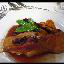

(64, 64, 3)
plate



In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
img=Image.open(train_dataset[43][0])
display(img)
print(np.array(img).shape)
print(class_names[train_dataset[43][1]])

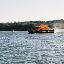

(64, 64, 3)


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
img=Image.open('/content/tiny-imagenet-200/val/images/val_5936.JPEG')
display(img)
print(np.array(img).shape)


#we completed the collection of data.Now we will try to load the data.

# data transformations

In [ ]:
from tqdm import tqdm_notebook
from PIL import Image
import numpy as np
import cupy as cp 
'''numpy executes on cpu even though you are on gpu.So i am using cupy which will execute on gpu and 10 times faster than numpy only on larger operations'''
import glob
n = 0
s = cp.zeros(3)
sq = cp.zeros(3)
for i in tqdm_notebook(train_dataset):
  data=Image.open(i[0])
  x = cp.array(data)/255
  s += x.sum(axis=(0,1))
  sq += cp.sum(cp.square(x), axis=(0,1))
  n += x.shape[0]*x.shape[1]

mu = s/n
std = cp.sqrt((sq/n - cp.square(mu)))
print(mu, sq/n, std, n)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.



[0.47591424 0.44747787 0.39549488] [0.30315546 0.27213527 0.23680098] [0.27687741 0.26813955 0.28352209] 216535040


In [ ]:
from torchvision import transforms

mu=[0.47591424,0.44747787,0.39549488]
std=[0.27687741,0.26813955,0.28352209]

train_transforms=transforms.Compose([
                                     
  transforms.ColorJitter(0.2,0.2,0.2),                                   
  transforms.RandomRotation(2),
  transforms.RandomCrop((64,64)),
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor(),
  transforms.Normalize(mu, std),
  transforms.RandomErasing(p=0.5)

])

test_transforms=transforms.Compose(
    [
      
     transforms.ToTensor(),
     transforms.Normalize(mu,std)

    ]
)


In [ ]:
from torch.utils.data import Dataset
from skimage import io
import numpy as np
from PIL import Image
class get_dataset(Dataset):
  def __init__(self,dataset,transforms=None):
    self.image,self.labels=zip(*dataset)
    self.transform=transforms
 
  def __len__(self):
    return (len(self.image))
    
  def __getitem__(self,index):
      if(torch.is_tensor(index)):
        index=index.tolist(index)
      #print(self.image[index])
      input1=Image.open(self.image[index])
      if(self.transform):
        input1=self.transform(input1)
      id=self.labels[index]
      return input1,id


In [ ]:
class DataLoader:
  """
  Helper class to load test and train data
  """
  def __init__(self, shuffle=True, batch_size=128, seed=1):
    cuda = torch.cuda.is_available()
    
    if cuda:
      torch.cuda.manual_seed(seed)

    # dataloader arguments - something you'll fetch these from cmdprmt
    self.dataloader_args = dict(shuffle=shuffle, batch_size=batch_size, num_workers=4, pin_memory=True) if cuda else dict(shuffle=shuffle, batch_size=batch_size)

  def load(self, data):
    return torch.utils.data.DataLoader(data, **self.dataloader_args)

In [ ]:
train=get_dataset(train_dataset,train_transforms)
test=get_dataset(test_dataset,test_transforms)
dataloader=DataLoader(batch_size=32)
train_loader=dataloader.load(train)
test_loader=dataloader.load(test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


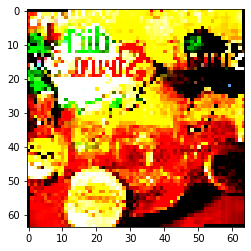

pop bottle, soda bottle



In [ ]:
dataiter=iter(train_loader)
input1,id=dataiter.next()
plt.imshow(input1[0].numpy().transpose(1,2,0))
plt.show()
print(class_names[id[0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


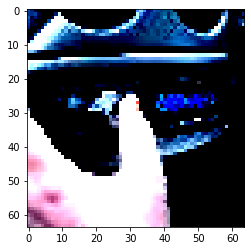

CD player



In [ ]:

dataiter=iter(test_loader)
input1,id=dataiter.next()
plt.imshow(input1[0].numpy().transpose(1,2,0))
plt.show()
print(class_names[id[0]])


# our architecture for tiny imagenet classification

In [ ]:
from torchsummary import summary
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self,in_planes, planes, stride=1 ):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out
    

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 32
        self.trainer = None
        self.name = "Models"

        self.conv1 = nn.Conv2d(3,32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.layer1 = self._make_layer(block, 32, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 64, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 128, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 64, num_blocks[3], stride=2)
        self.layer5 = self._make_layer(block, 128, num_blocks[3], stride=2)
        self.gap=nn.AdaptiveAvgPool2d((1,1))
        self.linear1 = nn.Linear(128*block.expansion, num_classes)
        self.linear2 = nn.Linear(num_classes, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.gap(out)
        out = out.view(out.size(0), -1)
        out = self.linear1(out)
        out = self.linear2(out)
        out=nn.functional.log_softmax(out)
        return out
        
    def summary(self, input_size):
      summary(self, input_size=input_size)

  


def ResNet18(num_class=200):
    return ResNet(BasicBlock, [2,2,2,2],num_classes=num_class)


In [ ]:
Model=ResNet18(110)
Model.cuda()
Model.summary((3, 64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             864
       BatchNorm2d-2           [-1, 32, 64, 64]              64
            Conv2d-3           [-1, 32, 64, 64]           9,216
       BatchNorm2d-4           [-1, 32, 64, 64]              64
            Conv2d-5           [-1, 32, 64, 64]           9,216
       BatchNorm2d-6           [-1, 32, 64, 64]              64
        BasicBlock-7           [-1, 32, 64, 64]               0
            Conv2d-8           [-1, 32, 64, 64]           9,216
       BatchNorm2d-9           [-1, 32, 64, 64]              64
           Conv2d-10           [-1, 32, 64, 64]           9,216
      BatchNorm2d-11           [-1, 32, 64, 64]              64
       BasicBlock-12           [-1, 32, 64, 64]               0
           Conv2d-13           [-1, 64, 32, 32]          18,432
      BatchNorm2d-14           [-1, 64,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


# implementing lr finder

In [ ]:
  
from __future__ import print_function,with_statement, division
import copy
import os
import torch
from tqdm.autonotebook import tqdm
from torch.optim.lr_scheduler import _LRScheduler
import matplotlib.pyplot as plt
import torch.nn.functional as F

try:
    from apex import amp

    IS_AMP_AVAILABLE = True
except ImportError:
    import logging

    logging.basicConfig()
    logger = logging.getLogger(__name__)
    logger.warning(
        "To enable mixed precision training, please install `apex`. "
        "Or you can re-install this package by the following command:\n"
        '  pip install torch-lr-finder -v --global-option="amp"'
    )
    IS_AMP_AVAILABLE = False
    del logging


class LRFinder(object):
    """Learning rate range test.
    The learning rate range test increases the learning rate in a pre-training run
    between two boundaries in a linear or exponential manner. It provides valuable
    information on how well the network can be trained over a range of learning rates
    and what is the optimal learning rate.
    Arguments:
        model (torch.nn.Module): wrapped model.
        optimizer (torch.optim.Optimizer): wrapped optimizer where the defined learning
            is assumed to be the lower boundary of the range test.
        criterion (torch.nn.Module): wrapped loss function.
        device (str or torch.device, optional): a string ("cpu" or "cuda") with an
            optional ordinal for the device type (e.g. "cuda:X", where is the ordinal).
            Alternatively, can be an object representing the device on which the
            computation will take place. Default: None, uses the same device as `model`.
        memory_cache (boolean, optional): if this flag is set to True, `state_dict` of
            model and optimizer will be cached in memory. Otherwise, they will be saved
            to files under the `cache_dir`.
        cache_dir (string, optional): path for storing temporary files. If no path is
            specified, system-wide temporary directory is used. Notice that this
            parameter will be ignored if `memory_cache` is True.
    Example:
        >>> lr_finder = LRFinder(net, optimizer, criterion, device="cuda")
        >>> lr_finder.range_test(dataloader, end_lr=100, num_iter=100)
        >>> lr_finder.plot() # to inspect the loss-learning rate graph
        >>> lr_finder.reset() # to reset the model and optimizer to their initial state
    Reference:
    Cyclical Learning Rates for Training Neural Networks: https://arxiv.org/abs/1506.01186
    fastai/lr_find: https://github.com/fastai/fastai
    """

    def __init__(
        self,
        model,
        optimizer,
        criterion,
        device=None,
        memory_cache=True,
        cache_dir=None,
    ):
        # Check if the optimizer is already attached to a scheduler
        self.optimizer = optimizer
        self._check_for_scheduler()

        self.model = model
        self.criterion = criterion
        self.history = {"lr": [], "loss": []}
        self.best_loss = None
        self.memory_cache = memory_cache
        self.cache_dir = cache_dir

        # Save the original state of the model and optimizer so they can be restored if
        # needed
        self.model_device = next(self.model.parameters()).device
        self.state_cacher = StateCacher(memory_cache, cache_dir=cache_dir)
        self.state_cacher.store("model", self.model.state_dict())
        self.state_cacher.store("optimizer", self.optimizer.state_dict())

        # If device is None, use the same as the model
        if device:
            self.device = device
        else:
            self.device = self.model_device

    def reset(self):
        """Restores the model and optimizer to their initial states."""

        self.model.load_state_dict(self.state_cacher.retrieve("model"))
        self.optimizer.load_state_dict(self.state_cacher.retrieve("optimizer"))
        self.model.to(self.model_device)

    def range_test(
        self,
        train_loader,
        val_loader=None,
        start_lr=None,
        end_lr=10,
        num_iter=100,
        step_mode="exp",
        smooth_f=0.05,
        diverge_th=5,
        accumulation_steps=1,
    ):
        """Performs the learning rate range test.
        Arguments:
            train_loader (torch.utils.data.DataLoader): the training set data laoder.
            val_loader (torch.utils.data.DataLoader, optional): if `None` the range test
                will only use the training loss. When given a data loader, the model is
                evaluated after each iteration on that dataset and the evaluation loss
                is used. Note that in this mode the test takes significantly longer but
                generally produces more precise results. Default: None.
            start_lr (float, optional): the starting learning rate for the range test.
                Default: None (uses the learning rate from the optimizer).
            end_lr (float, optional): the maximum learning rate to test. Default: 10.
            num_iter (int, optional): the number of iterations over which the test
                occurs. Default: 100.
            step_mode (str, optional): one of the available learning rate policies,
                linear or exponential ("linear", "exp"). Default: "exp".
            smooth_f (float, optional): the loss smoothing factor within the [0, 1[
                interval. Disabled if set to 0, otherwise the loss is smoothed using
                exponential smoothing. Default: 0.05.
            diverge_th (int, optional): the test is stopped when the loss surpasses the
                threshold:  diverge_th * best_loss. Default: 5.
            accumulation_steps (int, optional): steps for gradient accumulation. If it
                is 1, gradients are not accumulated. Default: 1.
        Example (fastai approach):
            >>> lr_finder = LRFinder(net, optimizer, criterion, device="cuda")
            >>> lr_finder.range_test(dataloader, end_lr=100, num_iter=100)
        Example (Leslie Smith's approach):
            >>> lr_finder = LRFinder(net, optimizer, criterion, device="cuda")
            >>> lr_finder.range_test(trainloader, val_loader=val_loader, end_lr=1, num_iter=100, step_mode="linear")
        Gradient accumulation is supported; example:
            >>> train_data = ...    # prepared dataset
            >>> desired_bs, real_bs = 32, 4         # batch size
            >>> accumulation_steps = desired_bs // real_bs     # required steps for accumulation
            >>> dataloader = torch.utils.data.DataLoader(train_data, batch_size=real_bs, shuffle=True)
            >>> acc_lr_finder = LRFinder(net, optimizer, criterion, device="cuda")
            >>> acc_lr_finder.range_test(dataloader, end_lr=10, num_iter=100, accumulation_steps=accumulation_steps)
        Reference:
        [Training Neural Nets on Larger Batches: Practical Tips for 1-GPU, Multi-GPU & Distributed setups](
        https://medium.com/huggingface/ec88c3e51255)
        [thomwolf/gradient_accumulation](https://gist.github.com/thomwolf/ac7a7da6b1888c2eeac8ac8b9b05d3d3)
        """

        # Reset test results
        self.history = {"lr": [], "loss": []}
        self.best_loss = None

        # Move the model to the proper device
        self.model.to(self.device)

        # Check if the optimizer is already attached to a scheduler
        self._check_for_scheduler()

        # Set the starting learning rate
        if start_lr:
            self._set_learning_rate(start_lr)

        # Initialize the proper learning rate policy
        if step_mode.lower() == "exp":
            lr_schedule = ExponentialLR(self.optimizer, end_lr, num_iter)
        elif step_mode.lower() == "linear":
            lr_schedule = LinearLR(self.optimizer, end_lr, num_iter)
        else:
            raise ValueError("expected one of (exp, linear), got {}".format(step_mode))

        if smooth_f < 0 or smooth_f >= 1:
            raise ValueError("smooth_f is outside the range [0, 1[")

        # Create an iterator to get data batch by batch
        iter_wrapper = DataLoaderIterWrapper(train_loader)
        for iteration in tqdm(range(num_iter)):
            # Train on batch and retrieve loss
            loss = self._train_batch(iter_wrapper, accumulation_steps)
            if val_loader:
                loss = self._validate(val_loader)

            # Update the learning rate
            lr_schedule.step()
            self.history["lr"].append(lr_schedule.get_lr()[0])

            # Track the best loss and smooth it if smooth_f is specified
            if iteration == 0:
                self.best_loss = loss
            else:
                if smooth_f > 0:
                    loss = smooth_f * loss + (1 - smooth_f) * self.history["loss"][-1]
                if loss < self.best_loss:
                    self.best_loss = loss

            # Check if the loss has diverged; if it has, stop the test
            self.history["loss"].append(loss)
            if loss > diverge_th * self.best_loss:
                print("Stopping early, the loss has diverged")
                break

        print("Learning rate search finished. See the graph with {finder_name}.plot()")

    def _set_learning_rate(self, new_lrs):
        if not isinstance(new_lrs, list):
            new_lrs = [new_lrs] * len(self.optimizer.param_groups)
        if len(new_lrs) != len(self.optimizer.param_groups):
            raise ValueError(
                "Length of `new_lrs` is not equal to the number of parameter groups "
                + "in the given optimizer"
            )

        for param_group, new_lr in zip(self.optimizer.param_groups, new_lrs):
            param_group["lr"] = new_lr

    def _check_for_scheduler(self):
        for param_group in self.optimizer.param_groups:
            if "initial_lr" in param_group:
                raise RuntimeError("Optimizer already has a scheduler attached to it")

    def _train_batch(self, iter_wrapper, accumulation_steps):
        self.model.train()
        total_loss = None  # for late initialization
        self.optimizer.zero_grad()
        for i in range(accumulation_steps):
            inputs, labels = iter_wrapper.get_batch()
            inputs, labels = self._move_to_device(inputs, labels)

            # Forward pass
            outputs = self.model(inputs)
            #loss = self.criterion(outputs, labels)
            loss=F.nll_loss(outputs,labels)
            # Loss should be averaged in each step
            loss /= accumulation_steps

            # Backward pass
            if IS_AMP_AVAILABLE and hasattr(self.optimizer, "_amp_stash"):
                # For minor performance optimization, see also:
                # https://nvidia.github.io/apex/advanced.html#gradient-accumulation-across-iterations
                delay_unscale = ((i + 1) % accumulation_steps) != 0

                with amp.scale_loss(
                    loss, self.optimizer, delay_unscale=delay_unscale
                ) as scaled_loss:
                    scaled_loss.backward()
            else:
                loss.backward()

            if total_loss is None:
                total_loss = loss
            else:
                total_loss += loss

        self.optimizer.step()

        return total_loss.item()

    def _move_to_device(self, inputs, labels):
        def move(obj, device):
            if isinstance(obj, tuple):
                return tuple(move(o, device) for o in obj)
            elif torch.is_tensor(obj):
                return obj.to(device)
            elif isinstance(obj, list):
                return [move(o, device) for o in obj]
            else:
                return obj

        inputs = move(inputs, self.device)
        labels = move(labels, self.device)
        return inputs, labels

    def _validate(self, dataloader):
        # Set model to evaluation mode and disable gradient computation
        running_loss = 0
        self.model.eval()
        with torch.no_grad():
            for inputs, labels in dataloader:
                # Move data to the correct device
                inputs, labels = self._move_to_device(inputs, labels)

                if isinstance(inputs, tuple) or isinstance(inputs, list):
                    batch_size = inputs[0].size(0)
                else:
                    batch_size = inputs.size(0)

                # Forward pass and loss computation
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)
                running_loss += loss.item() * batch_size

        return running_loss / len(dataloader.dataset)

    def plot(self, skip_start=10, skip_end=5, log_lr=True, show_lr=None, ax=None):
        """Plots the learning rate range test.
        Arguments:
            skip_start (int, optional): number of batches to trim from the start.
                Default: 10.
            skip_end (int, optional): number of batches to trim from the start.
                Default: 5.
            log_lr (bool, optional): True to plot the learning rate in a logarithmic
                scale; otherwise, plotted in a linear scale. Default: True.
            show_lr (float, optional): if set, adds a vertical line to visualize the
                specified learning rate. Default: None.
            ax (matplotlib.axes.Axes, optional): the plot is created in the specified
                matplotlib axes object and the figure is not be shown. If `None`, then
                the figure and axes object are created in this method and the figure is
                shown . Default: None.
        Returns:
            The matplotlib.axes.Axes object that contains the plot.
        """

        if skip_start < 0:
            raise ValueError("skip_start cannot be negative")
        if skip_end < 0:
            raise ValueError("skip_end cannot be negative")
        if show_lr is not None and not isinstance(show_lr, float):
            raise ValueError("show_lr must be float")

        # Get the data to plot from the history dictionary. Also, handle skip_end=0
        # properly so the behaviour is the expected
        lrs = self.history["lr"]
        losses = self.history["loss"]
        if skip_end == 0:
            lrs = lrs[skip_start:]
            losses = losses[skip_start:]
        else:
            lrs = lrs[skip_start:-skip_end]
            losses = losses[skip_start:-skip_end]

        # Create the figure and axes object if axes was not already given
        fig = None
        if ax is None:
            fig, ax = plt.subplots()

        # Plot loss as a function of the learning rate
        ax.plot(lrs, losses)
        if log_lr:
            ax.set_xscale("log")
        ax.set_xlabel("Learning rate")
        ax.set_ylabel("Loss")

        if show_lr is not None:
            ax.axvline(x=show_lr, color="red")

        # Show only if the figure was created internally
        if fig is not None:
            plt.show()

        return ax


class LinearLR(_LRScheduler):
    """Linearly increases the learning rate between two boundaries over a number of
    iterations.
    Arguments:
        optimizer (torch.optim.Optimizer): wrapped optimizer.
        end_lr (float): the final learning rate.
        num_iter (int): the number of iterations over which the test occurs.
        last_epoch (int, optional): the index of last epoch. Default: -1.
    """

    def __init__(self, optimizer, end_lr, num_iter, last_epoch=-1):
        self.end_lr = end_lr
        self.num_iter = num_iter
        super(LinearLR, self).__init__(optimizer, last_epoch)

    def get_lr(self):
        curr_iter = self.last_epoch + 1
        r = curr_iter / self.num_iter
        return [base_lr + r * (self.end_lr - base_lr) for base_lr in self.base_lrs]


class ExponentialLR(_LRScheduler):
    """Exponentially increases the learning rate between two boundaries over a number of
    iterations.
    Arguments:
        optimizer (torch.optim.Optimizer): wrapped optimizer.
        end_lr (float): the final learning rate.
        num_iter (int): the number of iterations over which the test occurs.
        last_epoch (int, optional): the index of last epoch. Default: -1.
    """

    def __init__(self, optimizer, end_lr, num_iter, last_epoch=-1):
        self.end_lr = end_lr
        self.num_iter = num_iter
        super(ExponentialLR, self).__init__(optimizer, last_epoch)

    def get_lr(self):
        curr_iter = self.last_epoch + 1
        r = curr_iter / self.num_iter
        return [base_lr * (self.end_lr / base_lr) ** r for base_lr in self.base_lrs]


class StateCacher(object):
    def __init__(self, in_memory, cache_dir=None):
        self.in_memory = in_memory
        self.cache_dir = cache_dir

        if self.cache_dir is None:
            import tempfile

            self.cache_dir = tempfile.gettempdir()
        else:
            if not os.path.isdir(self.cache_dir):
                raise ValueError("Given `cache_dir` is not a valid directory.")

        self.cached = {}

    def store(self, key, state_dict):
        if self.in_memory:
            self.cached.update({key: copy.deepcopy(state_dict)})
        else:
            fn = os.path.join(self.cache_dir, "state_{}_{}.pt".format(key, id(self)))
            self.cached.update({key: fn})
            torch.save(state_dict, fn)

    def retrieve(self, key):
        if key not in self.cached:
            raise KeyError("Target {} was not cached.".format(key))

        if self.in_memory:
            return self.cached.get(key)
        else:
            fn = self.cached.get(key)
            if not os.path.exists(fn):
                raise RuntimeError(
                    "Failed to load state in {}. File doesn't exist anymore.".format(fn)
                )
            state_dict = torch.load(fn, map_location=lambda storage, location: storage)
            return state_dict

    def __del__(self):
        """Check whether there are unused cached files existing in `cache_dir` before
        this instance being destroyed."""

        if self.in_memory:
            return

        for k in self.cached:
            if os.path.exists(self.cached[k]):
                os.remove(self.cached[k])


class DataLoaderIterWrapper(object):
    """A wrapper for iterating `torch.utils.data.DataLoader` with the ability to reset
    itself while `StopIteration` is raised."""

    def __init__(self, data_loader, auto_reset=True):
        self.data_loader = data_loader
        self.auto_reset = auto_reset
        self._iterator = iter(data_loader)

    def __next__(self):
        # Get a new set of inputs and labels
        try:
            inputs, labels = next(self._iterator)
        except StopIteration:
            if not self.auto_reset:
                raise
            self._iterator = iter(self.data_loader)
            inputs, labels, *_ = next(self._iterator)

        return inputs, labels

    # make it compatible with python 2
    next = __next__

    def get_batch(self):
        return next(self)


  pip install torch-lr-finder -v --global-option="amp"


# Testing lr finder

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


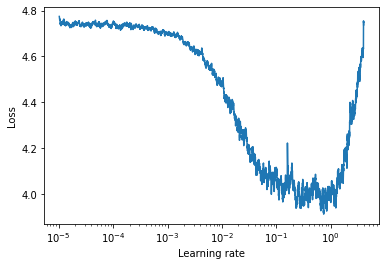

In [ ]:
# LR finder
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
L2lambda = 1e-3
criterion = F.nll_loss
optimizer = optim.SGD(Model.parameters(), lr=1e-5, weight_decay=L2lambda) #optim.Adam(model.parameters(), lr=1e-5, weight_decay=L2lambda) # 
lr_finder = LRFinder(Model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=100, num_iter=len(train_loader)*5)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [ ]:
loss = lr_finder.history['loss']
lr = lr_finder.history['lr']
print(lr[loss.index(min(loss))])
print(min(loss))



0.7411966612006148
3.9117362409397725


In [ ]:
print(loss)
print(lr)

[4.781828880310059, 4.777015948295594, 4.778618370294571, 4.778372153699397, 4.778852526155114, 4.780357015745491, 4.778497248873927, 4.776048354791131, 4.77505116051654, 4.773651760487844, 4.774690232262646, 4.772460203872475, 4.767674321364398, 4.766312742938084, 4.763488739206402, 4.764870662490832, 4.766567081262958, 4.763564516651409, 4.761527138024954, 4.762153459804127, 4.758150610880082, 4.762850888449176, 4.763536407037886, 4.761371544808245, 4.760669286270531, 4.758803896564853, 4.75808785144059, 4.75662795597702, 4.750746936596137, 4.751853522108859, 4.746558791025999, 4.744040893855985, 4.74218750295652, 4.7464155940486235, 4.739760593459962, 4.743443435521582, 4.743523427632526, 4.742442970819991, 4.744420253316894, 4.742763424839892, 4.74220364658038, 4.740937003489337, 4.7388013328574115, 4.7393080511876855, 4.741623778465337, 4.738676739093462, 4.7342048076182195, 4.739735186896732, 4.735652384918839, 4.736923707399582, 4.735576784839355, 4.737222389795996, 4.7397811120

In [ ]:
print(len(train_loader)*32)

49216


In [ ]:
import torch.optim as optim
from tqdm import tqdm_notebook
EPOCHS=50
max_lr=0.01
optimizer = optim.SGD(Model.parameters(),lr=max_lr,momentum=0.9, nesterov=True, weight_decay=1e-4)
#scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=max_lr, steps_per_epoch=int(len(train_loader))+1, epochs=EPOCHS)


In [ ]:
k=1
for epoch in range(EPOCHS):
    print(epoch)
    torch.backends.cudnn.benchmark = True
    torch.cuda.empty_cache()
    pbar = tqdm_notebook(train_loader)
    i=1
    average_accuracy=0
    for image,index in (pbar):
      # get 
      image= image.to('cuda')
      index= index.to('cuda')
      
      # Init
      optimizer.zero_grad()
      # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
      # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.
    
      # Predict
      predictions_1=Model(image)
      loss= nn.functional.nll_loss(predictions_1,index)
      loss.backward()
      optimizer.step()
      #scheduler.step()
      pred = predictions_1.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
      correct = pred.eq(index.view_as(pred)).sum().item()
      average_accuracy+=(correct/len(image))
      pbar.set_description(f'Loss={loss:0.4f}  Accuracy={(correct/len(image))*100 :0.2f}   AA={(average_accuracy/i)*100 :0.2f}')
      i+=1
        
    Model.eval()
    correct=0
    test_loss=0
    prev_test_loss=25
    with torch.no_grad():
        test_loss=0
        batches=0
        for image,index in (test_loader):
          image= image.to('cuda')
          index=index.to('cuda')
          
          predictions_1=Model(image)
          loss= nn.functional.nll_loss(predictions_1,index)
          test_loss+=loss
          batches+=1
          pred = predictions_1.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
          correct += pred.eq(index.view_as(pred)).sum().item()
        
        print("test_loss",test_loss/(batches))  
        print("Accuracy=","%.2f" %(100. * correct / len(test_loader.dataset)))
        

0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



test_loss tensor(3.7651, device='cuda:0')
Accuracy= 11.86
1



test_loss tensor(5.1352, device='cuda:0')
Accuracy= 8.43
2



test_loss tensor(3.5962, device='cuda:0')
Accuracy= 14.46
3



test_loss tensor(3.9750, device='cuda:0')
Accuracy= 15.66
4



test_loss tensor(4.2783, device='cuda:0')
Accuracy= 16.31
5



test_loss tensor(3.2521, device='cuda:0')
Accuracy= 24.93
6



test_loss tensor(2.8243, device='cuda:0')
Accuracy= 31.14
7



test_loss tensor(3.0252, device='cuda:0')
Accuracy= 28.54
8



test_loss tensor(2.7842, device='cuda:0')
Accuracy= 33.83
9



test_loss tensor(3.2564, device='cuda:0')
Accuracy= 28.27
10



test_loss tensor(2.5349, device='cuda:0')
Accuracy= 35.96
11



test_loss tensor(2.4327, device='cuda:0')
Accuracy= 39.30
12



test_loss tensor(3.9050, device='cuda:0')
Accuracy= 21.69
13



test_loss tensor(2.4046, device='cuda:0')
Accuracy= 40.41
14



test_loss tensor(2.3809, device='cuda:0')
Accuracy= 40.69
15



test_loss tensor(2.9906, device='cuda:0')
Accuracy= 32.81
16



test_loss tensor(2.3989, device='cuda:0')
Accuracy= 40.50
17



test_loss tensor(2.3986, device='cuda:0')
Accuracy= 41.52
18



test_loss tensor(2.3505, device='cuda:0')
Accuracy= 41.80
19



test_loss tensor(2.5131, device='cuda:0')
Accuracy= 40.96
20



test_loss tensor(2.3310, device='cuda:0')
Accuracy= 43.47
21



test_loss tensor(2.9865, device='cuda:0')
Accuracy= 33.46
22



test_loss tensor(2.5657, device='cuda:0')
Accuracy= 40.69
23



test_loss tensor(2.3273, device='cuda:0')
Accuracy= 44.86
24



test_loss tensor(3.9280, device='cuda:0')
Accuracy= 28.17
25



test_loss tensor(2.3998, device='cuda:0')
Accuracy= 43.37
26



test_loss tensor(2.4484, device='cuda:0')
Accuracy= 44.30
27



test_loss tensor(3.5598, device='cuda:0')
Accuracy= 30.49
28



test_loss tensor(2.4462, device='cuda:0')
Accuracy= 43.10
29



test_loss tensor(2.6085, device='cuda:0')
Accuracy= 40.78
30



test_loss tensor(2.5946, device='cuda:0')
Accuracy= 42.54
31



test_loss tensor(2.5063, device='cuda:0')
Accuracy= 43.74
32



test_loss tensor(2.4710, device='cuda:0')
Accuracy= 44.02
33



test_loss tensor(2.3708, device='cuda:0')
Accuracy= 45.51
34



test_loss tensor(3.3729, device='cuda:0')
Accuracy= 32.34
35



test_loss tensor(6.3197, device='cuda:0')
Accuracy= 17.42
36



test_loss tensor(2.8990, device='cuda:0')
Accuracy= 39.67
37



test_loss tensor(3.0706, device='cuda:0')
Accuracy= 38.09
38



test_loss tensor(3.0767, device='cuda:0')
Accuracy= 38.74
39



test_loss tensor(2.8023, device='cuda:0')
Accuracy= 38.18
40



test_loss tensor(2.4224, device='cuda:0')
Accuracy= 46.80
41



test_loss tensor(2.5279, device='cuda:0')
Accuracy= 42.82
42



test_loss tensor(2.9484, device='cuda:0')
Accuracy= 38.92
43



test_loss tensor(3.0023, device='cuda:0')
Accuracy= 39.30
44



test_loss tensor(2.5940, device='cuda:0')
Accuracy= 44.58
45



test_loss tensor(2.4989, device='cuda:0')
Accuracy= 45.04
46



test_loss tensor(2.5086, device='cuda:0')
Accuracy= 44.39
47



test_loss tensor(4.9175, device='cuda:0')
Accuracy= 23.45
48



test_loss tensor(2.4901, device='cuda:0')
Accuracy= 44.67
49



test_loss tensor(2.4566, device='cuda:0')
Accuracy= 44.11


In [ ]:
import requests
f = open("/content/tracator.png",'wb')
f.write(requests.get('https://www.mahindratractor.com/images/Album/Albumthumb/jivo5.png').content)
f.close()

In [ ]:
Model=ResNet18(100)
Model.load_state_dict(torch.load('/content/drive/My Drive/TinyImagenetproject1_Model_SGD_NOSCHEDULER.pt'))
Model.cuda()
Model.summary((3, 64,64))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


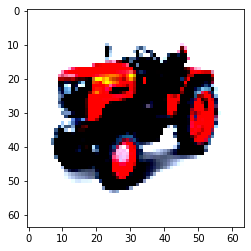

fly



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
Model.eval()
with torch.no_grad():
      image=Image.open('/content/tracator.png').resize((64,64))
      image=test_transforms(image)
      plt.imshow(np.array(image).transpose(1,2,0))
      plt.show()
      image= image.to('cuda').unsqueeze(0) 
      predictions_1=Model(image)
      pred = predictions_1.argmax(dim=1, keepdim=True)
      print(class_names[pred])  # get the index of the max log-probability
         

In [ ]:
torch.save(Model.state_dict(), "/content/drive/My Drive/TinyImagenetproject1_FINAL.pt")